## Importing data

In [459]:
# !pip install scikit-learn-extra
# %load_ext rpy2.ipython

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import warnings
import sklearn.utils
from sklearn.svm import SVC, SVR
from numpy import linalg as LA
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import roc_curve
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, KFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense
from statistics import mean
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from imblearn.over_sampling import SMOTE
warnings.simplefilter('ignore', ConvergenceWarning)

In [185]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages(c('caret','mlr'))
install.packages('skimr')
install.packages('randomForest')
install.packages('LiblineaR')
library(skimr)
library(caret)

In [187]:
path='drive/MyDrive/Notebooks/Itau/files_itau/'
file1='agrupamento.csv'
file2='classificacao_Q1.csv'
file3='classificacao_Q2.csv'
file4='regressao_Q1.csv'
file5='regressao_Q2.csv'

clustering = pd.read_csv(path+file1, header=0, delimiter=',')
classification_q1 = pd.read_csv(path+file2, header=0, delimiter=',')
classification_q2 = pd.read_csv(path+file3, header=0, delimiter=',')
regression_q1 = pd.read_csv(path+file4, header=0, delimiter=',')
regression_q2 = pd.read_csv(path+file5, header=0, delimiter=',')

## Clustering

In [188]:
clustering.head()

,x0,x1,x2,x3,x4
0,5.447043,6.319084,2.664620,6.568743,4.802295
1,4.875562,4.796801,2.154231,6.832907,5.321401
2,5.582920,5.060775,1.895917,6.004299,6.330105
3,6.370727,3.717727,1.729007,5.923414,4.533557
4,4.789262,4.510056,0.669330,7.731273,4.272356


,x0,x1,x2,x3,x4
0,5.447043,6.319084,2.664620,6.568743,4.802295
1,4.875562,4.796801,2.154231,6.832907,5.321401
2,5.582920,5.060775,1.895917,6.004299,6.330105
3,6.370727,3.717727,1.729007,5.923414,4.533557
4,4.789262,4.510056,0.669330,7.731273,4.272356


In [460]:
group = linkage(clustering, 'single')

In [461]:
group

array([[ 38.        ,  44.        ,   0.38891797,   2.        ],
       [ 49.        ,  62.        ,   0.39024547,   2.        ],
       [ 31.        ,  32.        ,   0.41514964,   2.        ],
       [ 28.        ,  39.        ,   0.43727901,   2.        ],
       [ 61.        ,  65.        ,   0.478415  ,   2.        ],
       [ 21.        ,  87.        ,   0.48338818,   3.        ],
       [ 70.        ,  73.        ,   0.50382578,   2.        ],
       [ 35.        ,  90.        ,   0.52300244,   4.        ],
       [ 76.        ,  91.        ,   0.55737961,   3.        ],
       [ 78.        ,  93.        ,   0.56029893,   4.        ],
       [  8.        ,  10.        ,   0.56445503,   2.        ],
       [ 27.        ,  34.        ,   0.56726044,   2.        ],
       [ 23.        ,  92.        ,   0.58892968,   5.        ],
       [ 96.        ,  97.        ,   0.6230377 ,   7.        ],
       [ 77.        ,  83.        ,   0.66521114,   2.        ],
       [ 82.        ,  94

In [189]:
clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      85 non-null     float64
 1   x1      85 non-null     float64
 2   x2      85 non-null     float64
 3   x3      85 non-null     float64
 4   x4      85 non-null     float64
dtypes: float64(5)
memory usage: 3.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      85 non-null     float64
 1   x1      85 non-null     float64
 2   x2      85 non-null     float64
 3   x3      85 non-null     float64
 4   x4      85 non-null     float64
dtypes: float64(5)
memory usage: 3.4 KB


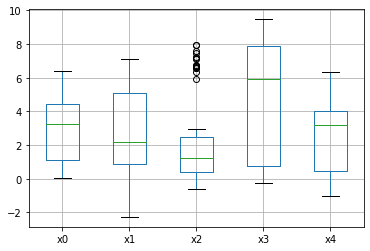

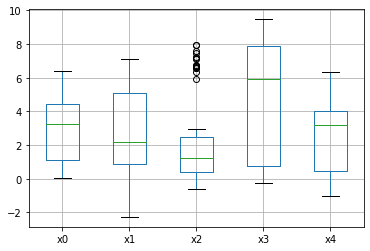

In [190]:
clustering.boxplot(column=['x0','x1','x2','x3','x4'])

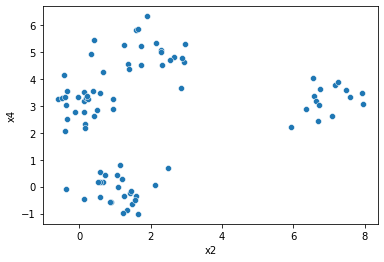

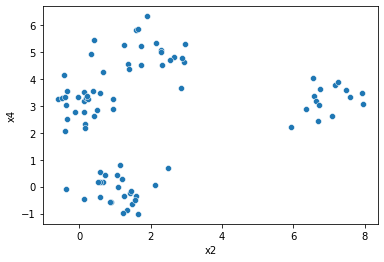

In [191]:
sns.scatterplot(x='x2',y='x4',data=clustering)

### Checking missing

In [192]:
clustering.isnull().sum()

x0    0
x1    0
x2    0
x3    0
x4    0
dtype: int64

x0    0
x1    0
x2    0
x3    0
x4    0
dtype: int64

In [193]:
mean = clustering.x2.mean()
std = clustering.x2.std()

outliers = [x for x in clustering['x2'] if x > (mean+2*std)]
outliers

[7.075196893238103,
 7.170877987888581,
 7.938085419607942,
 7.4752119190930255,
 7.245959585753252,
 7.915729382927178,
 7.5897200603606425]

[7.075196893238103,
 7.170877987888581,
 7.938085419607942,
 7.4752119190930255,
 7.245959585753252,
 7.915729382927178,
 7.5897200603606425]

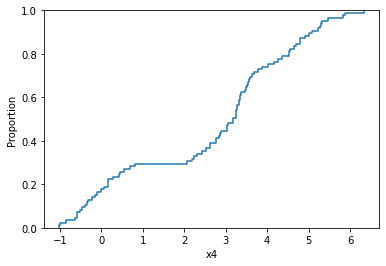

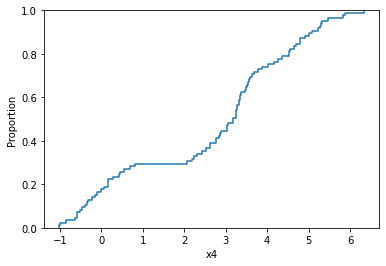

In [194]:
sns.ecdfplot(clustering, x='x4')

(array([[0., 0., 0., 0., 1., 0., 2., 2., 0., 0.],
        [0., 0., 0., 1., 0., 0., 3., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 2., 2., 0., 0.],
        [0., 0., 0., 1., 0., 2., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 2., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 2., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1., 2., 0., 0.],
        [0., 0., 0., 0., 1., 0., 3., 0., 1., 0.],
        [0., 0., 0., 1., 0., 3., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1., 2., 1., 0., 0.],
        [0., 0., 0., 1., 0., 2., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1., 2., 1., 0., 0.],
        [0., 0., 0., 0., 2., 2., 0., 0., 0., 1.],
        [0., 0., 0., 0., 2., 2., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 3., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1., 2., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 2., 1., 0., 0.],
        [0., 0., 0., 1., 0., 2., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 3., 0., 0., 0.],


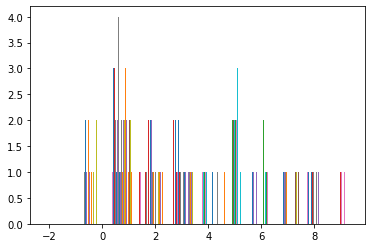

(array([[0., 0., 0., 0., 1., 0., 2., 2., 0., 0.],
        [0., 0., 0., 1., 0., 0., 3., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 2., 2., 0., 0.],
        [0., 0., 0., 1., 0., 2., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0., 2., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 2., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1., 2., 0., 0.],
        [0., 0., 0., 0., 1., 0., 3., 0., 1., 0.],
        [0., 0., 0., 1., 0., 3., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1., 2., 1., 0., 0.],
        [0., 0., 0., 1., 0., 2., 1., 0., 1., 0.],
        [0., 0., 0., 1., 0., 1., 1., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1., 2., 1., 0., 0.],
        [0., 0., 0., 0., 2., 2., 0., 0., 0., 1.],
        [0., 0., 0., 0., 2., 2., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 3., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 1., 2., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 2., 1., 0., 0.],
        [0., 0., 0., 1., 0., 2., 1., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 3., 0., 0., 0.],


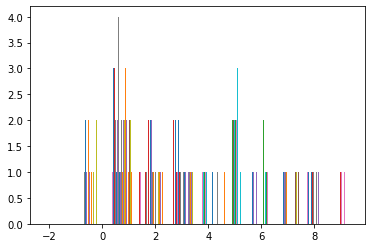

In [195]:
plt.hist(clustering)

### PCA



In [196]:
# median and std
clustering.describe()

,x0,x1,x2,x3,x4
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2.817069,2.748916,2.035626,4.360334,2.628691
std,1.804590,2.496234,2.471162,3.590181,2.012583
min,0.040614,-2.268887,-0.595652,-0.257424,-1.013659
25%,1.087289,0.886838,0.393542,0.736619,0.439842
50%,3.245579,2.148492,1.244704,5.923414,3.178894
75%,4.443743,5.099830,2.493123,7.858465,4.030374
max,6.421292,7.094901,7.938085,9.464671,6.330105


,x0,x1,x2,x3,x4
count,85.000000,85.000000,85.000000,85.000000,85.000000
mean,2.817069,2.748916,2.035626,4.360334,2.628691
std,1.804590,2.496234,2.471162,3.590181,2.012583
min,0.040614,-2.268887,-0.595652,-0.257424,-1.013659
25%,1.087289,0.886838,0.393542,0.736619,0.439842
50%,3.245579,2.148492,1.244704,5.923414,3.178894
75%,4.443743,5.099830,2.493123,7.858465,4.030374
max,6.421292,7.094901,7.938085,9.464671,6.330105


In [197]:
#checking transformation
0.040614/9.464671

0.004291115877139311

0.004291115877139311

In [198]:
transformed_clustering = clustering.applymap(lambda x: math.log10(math.fabs(x))) 

In [199]:
# normalization
normalized_clustering = (transformed_clustering-transformed_clustering.mean())/transformed_clustering.std()
normalized_clustering.describe()

,x0,x1,x2,x3,x4
count,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01
mean,-2.978010e-16,-7.967483e-17,1.018793e-16,-1.325737e-16,-3.787820e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.299743e+00,-4.630193e+00,-2.707433e+00,-2.638664e+00,-4.169547e+00
25%,-7.071732e-01,-4.924513e-01,-7.340616e-01,-6.730920e-01,-6.112389e-01
50%,4.879819e-01,1.227152e-01,9.636327e-02,6.773878e-01,4.575308e-01
75%,8.313613e-01,8.046914e-01,6.568833e-01,8.605173e-01,6.431598e-01
max,1.233666e+00,1.077899e+00,1.591410e+00,9.809986e-01,9.962759e-01


,x0,x1,x2,x3,x4
count,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01,8.500000e+01
mean,-2.978010e-16,-7.967483e-17,1.018793e-16,-1.325737e-16,-3.787820e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.299743e+00,-4.630193e+00,-2.707433e+00,-2.638664e+00,-4.169547e+00
25%,-7.071732e-01,-4.924513e-01,-7.340616e-01,-6.730920e-01,-6.112389e-01
50%,4.879819e-01,1.227152e-01,9.636327e-02,6.773878e-01,4.575308e-01
75%,8.313613e-01,8.046914e-01,6.568833e-01,8.605173e-01,6.431598e-01
max,1.233666e+00,1.077899e+00,1.591410e+00,9.809986e-01,9.962759e-01


In [200]:
correlation = normalized_clustering.corr()
correlation

,x0,x1,x2,x3,x4
x0,1.000000,-0.212503,0.178422,0.713380,-0.288675
x1,-0.212503,1.000000,0.358798,-0.267543,0.669343
x2,0.178422,0.358798,1.000000,0.231720,0.110912
x3,0.713380,-0.267543,0.231720,1.000000,-0.400078
x4,-0.288675,0.669343,0.110912,-0.400078,1.000000


,x0,x1,x2,x3,x4
x0,1.000000,-0.212503,0.178422,0.713380,-0.288675
x1,-0.212503,1.000000,0.358798,-0.267543,0.669343
x2,0.178422,0.358798,1.000000,0.231720,0.110912
x3,0.713380,-0.267543,0.231720,1.000000,-0.400078
x4,-0.288675,0.669343,0.110912,-0.400078,1.000000


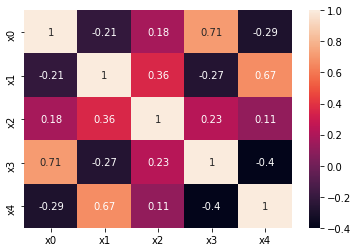

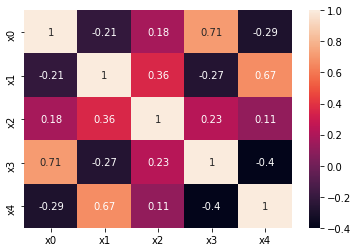

In [201]:
# matrix of correlation
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [202]:
# eigenvalues and eigenvectors

In [203]:
values, vectors = LA.eig(correlation)

In [204]:
# principal factors
p_factors = np.matmul(normalized_clustering, vectors)
p_factors

,x0,x1,x2,x3,x4
0,-0.035313,1.799806,-0.704066,0.078779,-0.018467
1,-0.056419,1.563979,-0.772329,-0.106430,0.072107
2,0.005558,1.578100,-0.971953,-0.009386,0.153645
3,-0.314888,1.388334,-0.916053,0.106456,0.220539
4,-0.213233,0.887109,-1.325293,-0.091706,-0.301819
...,...,...,...,...,...
80,1.185669,1.237530,0.824202,-0.134081,0.113449
81,1.397343,1.236412,0.828903,0.550919,0.416197
82,1.349993,0.985224,1.118046,-0.034144,-0.076615
83,1.316695,1.331524,1.004719,0.029843,0.014092


,x0,x1,x2,x3,x4
0,-0.035313,1.799806,-0.704066,0.078779,-0.018467
1,-0.056419,1.563979,-0.772329,-0.106430,0.072107
2,0.005558,1.578100,-0.971953,-0.009386,0.153645
3,-0.314888,1.388334,-0.916053,0.106456,0.220539
4,-0.213233,0.887109,-1.325293,-0.091706,-0.301819
...,...,...,...,...,...
80,1.185669,1.237530,0.824202,-0.134081,0.113449
81,1.397343,1.236412,0.828903,0.550919,0.416197
82,1.349993,0.985224,1.118046,-0.034144,-0.076615
83,1.316695,1.331524,1.004719,0.029843,0.014092


In [205]:
#sum and sum of square of principal factors

sum_p = p_factors.sum()
sum_p_square = (p_factors**2).sum()
sum_total = sum_p_square.sum()

In [206]:
impact = [sum_p_square['x'+str(x)]/sum_total for x in range(0,5)]
impact

[0.45619320417382203,
 0.3043191382695916,
 0.1290753734028975,
 0.052754088787724494,
 0.05765819536596427]

[0.45619320417382203,
 0.3043191382695916,
 0.1290753734028975,
 0.052754088787724494,
 0.05765819536596427]

<BarContainer object of 5 artists>

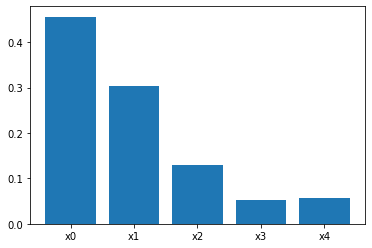

<BarContainer object of 5 artists>

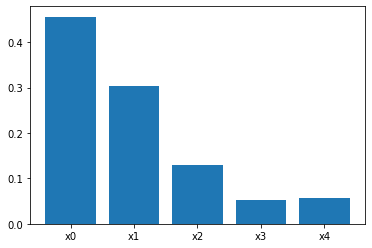

In [207]:
#variaveis que mais influenciam no dataset
plt.bar(['x0','x1','x2','x3','x4'], impact)

In [208]:
pca = PCA(n_components=5)

pca.fit(transformed_clustering)
percentages = pca.explained_variance_ratio_
percentages

array([0.47832087, 0.30077481, 0.12285319, 0.05535777, 0.04269336])

array([0.47832087, 0.30077481, 0.12285319, 0.05535777, 0.04269336])

In [209]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'x2')

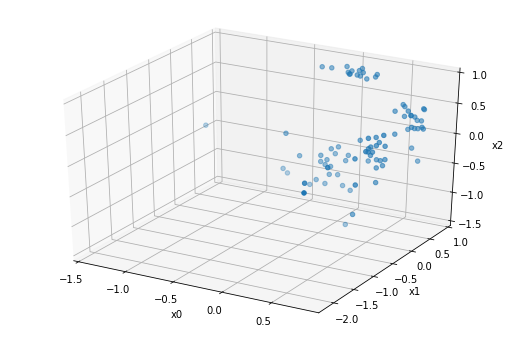

Text(0.5, 0, 'x2')

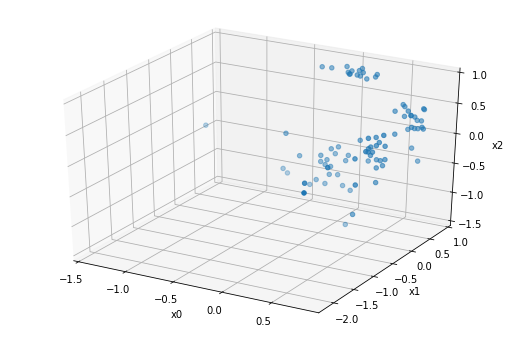

In [210]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.scatter3D(transformed_clustering['x0'],transformed_clustering['x1'],transformed_clustering['x2'])
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

### K-means

In [211]:
#choose the important variables
df_cluster = transformed_clustering[['x0','x1','x2']]

In [212]:
#after scaling, mean has to be equal to 0 and std has to be equal to 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
df_scaled[:20]

array([[ 1.06009473,  0.98790372,  0.71478098],
       [ 0.9382464 ,  0.75847668,  0.54218869],
       [ 1.08718147,  0.80306807,  0.43850734],
       [ 1.23229657,  0.54635332,  0.36370373],
       [ 0.91861315,  0.70716839, -0.40663145],
       [ 0.91861654,  0.80946711,  0.16413744],
       [ 1.24098764,  0.59976598,  0.29333274],
       [ 1.10820074,  0.84748046,  0.79775552],
       [ 0.86889075,  0.69777105,  0.59859586],
       [ 1.06839086,  0.7481177 , -0.79803205],
       [ 0.8701991 ,  0.69759163,  0.59239247],
       [ 0.86969984,  1.03252249,  0.32742214],
       [ 1.01281915,  0.79098657,  0.18700258],
       [ 0.50182126,  0.61721076,  0.67925346],
       [ 0.55725312,  0.90794078,  0.79126366],
       [ 0.84864413,  0.5864597 ,  0.76599333],
       [ 0.74468624,  0.82373142,  0.09693517],
       [ 1.02644131,  0.43091549,  0.36027039],
       [ 0.76976146,  0.56558737,  0.59467792],
       [ 0.64349617,  0.82199646,  0.77730793]])

array([[ 1.06009473,  0.98790372,  0.71478098],
       [ 0.9382464 ,  0.75847668,  0.54218869],
       [ 1.08718147,  0.80306807,  0.43850734],
       [ 1.23229657,  0.54635332,  0.36370373],
       [ 0.91861315,  0.70716839, -0.40663145],
       [ 0.91861654,  0.80946711,  0.16413744],
       [ 1.24098764,  0.59976598,  0.29333274],
       [ 1.10820074,  0.84748046,  0.79775552],
       [ 0.86889075,  0.69777105,  0.59859586],
       [ 1.06839086,  0.7481177 , -0.79803205],
       [ 0.8701991 ,  0.69759163,  0.59239247],
       [ 0.86969984,  1.03252249,  0.32742214],
       [ 1.01281915,  0.79098657,  0.18700258],
       [ 0.50182126,  0.61721076,  0.67925346],
       [ 0.55725312,  0.90794078,  0.79126366],
       [ 0.84864413,  0.5864597 ,  0.76599333],
       [ 0.74468624,  0.82373142,  0.09693517],
       [ 1.02644131,  0.43091549,  0.36027039],
       [ 0.76976146,  0.56558737,  0.59467792],
       [ 0.64349617,  0.82199646,  0.77730793]])

In [213]:
df = pd.DataFrame(df_scaled, columns=['x0','x1','x2'])
df.head()

,x0,x1,x2
0,1.060095,0.987904,0.714781
1,0.938246,0.758477,0.542189
2,1.087181,0.803068,0.438507
3,1.232297,0.546353,0.363704
4,0.918613,0.707168,-0.406631


,x0,x1,x2
0,1.060095,0.987904,0.714781
1,0.938246,0.758477,0.542189
2,1.087181,0.803068,0.438507
3,1.232297,0.546353,0.363704
4,0.918613,0.707168,-0.406631


In [214]:
df.mean()

x0   -6.857260e-17
x1   -1.371452e-16
x2   -5.747037e-17
dtype: float64

x0   -6.857260e-17
x1   -1.371452e-16
x2   -5.747037e-17
dtype: float64

In [215]:
df.std()

x0    1.005935
x1    1.005935
x2    1.005935
dtype: float64

x0    1.005935
x1    1.005935
x2    1.005935
dtype: float64

In [216]:
#elbow method
def calculate_wcss(data):
  wcss=[]
  for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator =math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

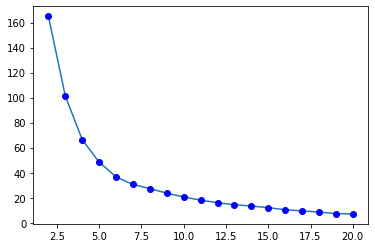

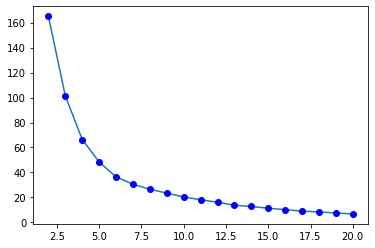

In [217]:
#plotting grapf of elbow method
wcss = calculate_wcss(df_scaled)
sns.lineplot(x=range(2,21),y=wcss,)
plt.plot(range(2,21),wcss,'bo')

In [218]:
n = optimal_number_of_clusters(wcss)
print(f'Optimal number of cluster = {n}')

kmeans = KMeans(n_clusters=n)
clusters=kmeans.fit_predict(df_scaled)

Optimal number of cluster = 6
Optimal number of cluster = 6


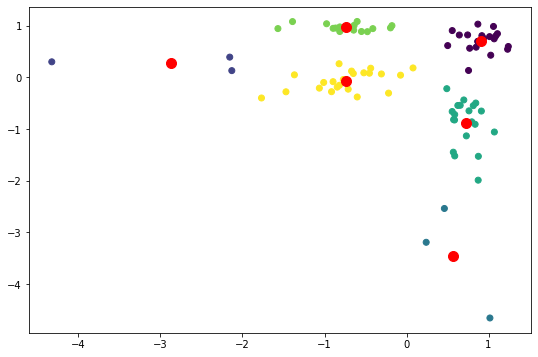

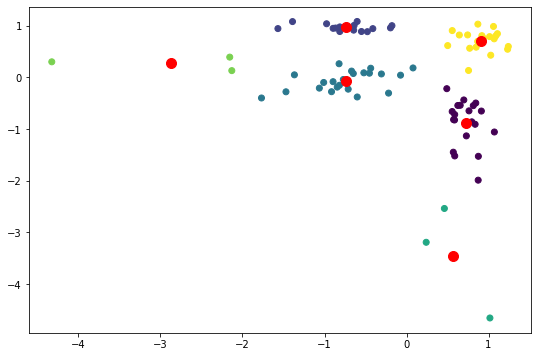

In [219]:
plt.figure(figsize=(9,6))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

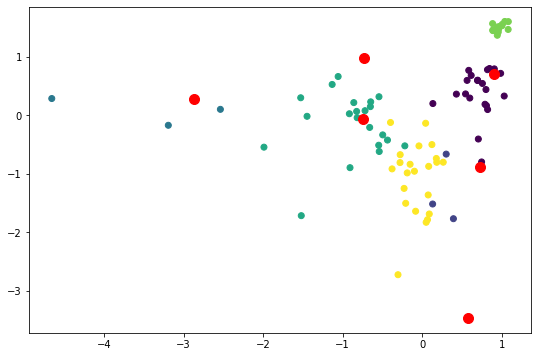

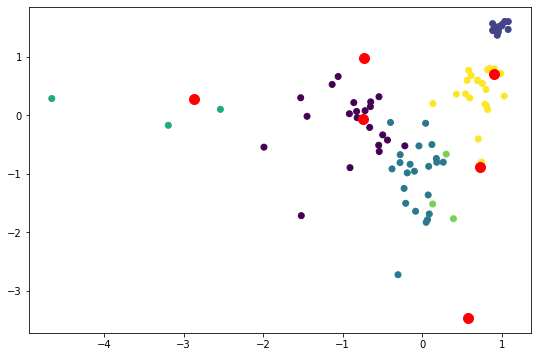

In [220]:
plt.figure(figsize=(9,6))
plt.scatter(df_scaled[:,1], df_scaled[:,2], c=clusters)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

In [221]:
#silhoutte and Calinski Harabasz Score (CH Score)

labels = kmeans.labels_
metrics.silhouette_score(df_scaled, labels, metric='euclidean')

0.5635435486983865

0.5635435486983865

In [222]:
metrics.calinski_harabasz_score(df_scaled, labels)

94.7783070805318

94.7783070805318

In [223]:
db = DBSCAN(eps=0.3, min_samples=10).fit(df_scaled)
labels = db.labels_
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[db.core_sample_indices_] = True

In [224]:
clusterNum = len(set(labels))
realclusterNum = len(set(labels)) - (1 if -1 in labels else 0) #ignoring noise
noise = list(labels).count(-1)

<Figure size 648x432 with 0 Axes>

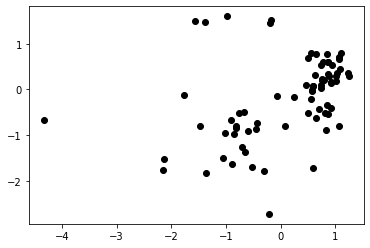

<Figure size 648x432 with 0 Axes>

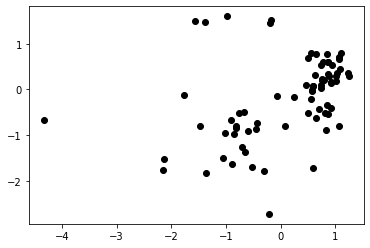

In [225]:
plt.figure(figsize=(9,6))

unique_labels = set(labels)
colors = [plt.cm.Spectral(x) for x in np.linspace(0,1,len(unique_labels))]

for k,col in zip(unique_labels, colors):
  if k==-1:
    col=[0,0,0,1]
    class_member_mask=(labels == k)

    xy = df_scaled[class_member_mask & core_mask]
    plt.plot(xy[:,0], 
             xy[:,2],
             'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k',
             markersize=14)
    xy = df_scaled[class_member_mask & ~core_mask]
    plt.plot(xy[:,0], 
             xy[:,2],
             'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k',
             markersize=6)
  plt.show()
    

In [226]:
kmedoids = KMedoids(n_clusters=6, random_state=0)
clusters = kmedoids.fit(df_scaled)
labels = kmedoids.labels_
centers = kmedoids.cluster_centers_
inertia = kmedoids.inertia_

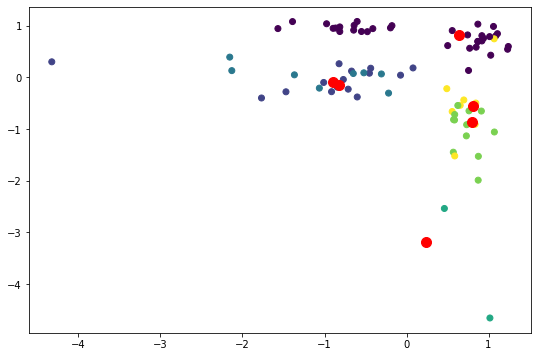

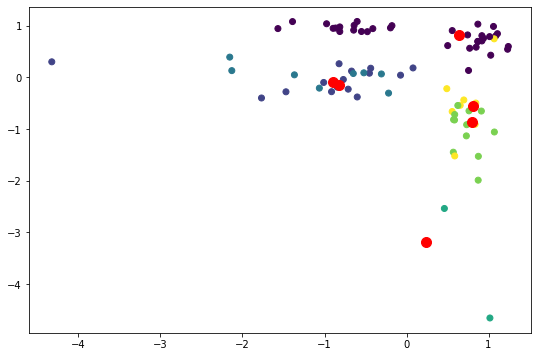

In [227]:
plt.figure(figsize=(9,6))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], s=100, c='red')

## Classification

In [228]:
classification_q1.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,-1.79796,-1.75901,-2.14257,-0.01878,-0.58601,-3.08224,-1.71369,1.41805,2.29783,1.11745,-3.43483,1.94926,0
1,-2.78612,-1.60622,-4.05247,3.33814,1.44255,-3.95343,-3.32328,0.71019,2.31973,0.57596,-4.22278,0.51171,0
2,-1.31957,2.61125,-0.99663,0.34752,0.85253,4.22652,0.84765,0.88530,-1.01460,1.03488,-0.84593,2.64307,1
3,-3.26219,-2.11510,0.68081,-0.49290,-2.45122,-2.37668,-0.00338,3.95559,1.42793,1.68710,-1.35533,2.82004,0
4,5.26181,1.85527,-2.29242,-0.86763,0.11625,-2.17675,-1.72692,-2.34726,1.98107,-4.58177,-2.26649,-3.33875,1


,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,-1.79796,-1.75901,-2.14257,-0.01878,-0.58601,-3.08224,-1.71369,1.41805,2.29783,1.11745,-3.43483,1.94926,0
1,-2.78612,-1.60622,-4.05247,3.33814,1.44255,-3.95343,-3.32328,0.71019,2.31973,0.57596,-4.22278,0.51171,0
2,-1.31957,2.61125,-0.99663,0.34752,0.85253,4.22652,0.84765,0.88530,-1.01460,1.03488,-0.84593,2.64307,1
3,-3.26219,-2.11510,0.68081,-0.49290,-2.45122,-2.37668,-0.00338,3.95559,1.42793,1.68710,-1.35533,2.82004,0
4,5.26181,1.85527,-2.29242,-0.86763,0.11625,-2.17675,-1.72692,-2.34726,1.98107,-4.58177,-2.26649,-3.33875,1


In [229]:
classification_q2.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,target
0,-1.39917,0.96108,-0.36145,0.26092,2.78953,-1.55046,-0.79886,0.24304,1.51733,-0.03357,-1.51127,-0.97444,-0.01934,0
1,-2.48564,1.24529,-0.39431,1.06648,1.71957,-0.60296,-2.35698,-2.31878,0.95555,-2.00420,-0.75294,-3.64680,-0.55923,0
2,-0.57025,0.65495,-0.73706,0.22444,-0.44094,-0.42596,0.44267,-1.74196,-0.06599,-0.36783,0.93065,-0.72392,0.37139,0
3,2.10165,1.46236,-0.25678,2.58908,-3.40158,2.43561,0.74701,-0.65229,-0.45497,-1.57951,2.07367,1.86435,-0.37664,1
4,3.01588,-2.50913,-2.01442,2.10296,-3.05465,5.38227,0.46846,1.57586,3.02176,-0.86271,-1.14418,-0.89712,0.61823,1


,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,target
0,-1.39917,0.96108,-0.36145,0.26092,2.78953,-1.55046,-0.79886,0.24304,1.51733,-0.03357,-1.51127,-0.97444,-0.01934,0
1,-2.48564,1.24529,-0.39431,1.06648,1.71957,-0.60296,-2.35698,-2.31878,0.95555,-2.00420,-0.75294,-3.64680,-0.55923,0
2,-0.57025,0.65495,-0.73706,0.22444,-0.44094,-0.42596,0.44267,-1.74196,-0.06599,-0.36783,0.93065,-0.72392,0.37139,0
3,2.10165,1.46236,-0.25678,2.58908,-3.40158,2.43561,0.74701,-0.65229,-0.45497,-1.57951,2.07367,1.86435,-0.37664,1
4,3.01588,-2.50913,-2.01442,2.10296,-3.05465,5.38227,0.46846,1.57586,3.02176,-0.86271,-1.14418,-0.89712,0.61823,1


In [230]:
classification_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     1800 non-null   float64
 1   v_2     1800 non-null   float64
 2   v_3     1800 non-null   float64
 3   v_4     1800 non-null   float64
 4   v_5     1800 non-null   float64
 5   v_6     1800 non-null   float64
 6   v_7     1800 non-null   float64
 7   v_8     1800 non-null   float64
 8   v_9     1800 non-null   float64
 9   v_10    1800 non-null   float64
 10  v_11    1800 non-null   float64
 11  v_12    1800 non-null   float64
 12  target  1800 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 182.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     1800 non-null   float64
 1   v_2     1800 non-null   float64
 2   v_3     1800 non-null   f

In [231]:
classification_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     2500 non-null   float64
 1   v_2     2500 non-null   float64
 2   v_3     2500 non-null   float64
 3   v_4     2500 non-null   float64
 4   v_5     2500 non-null   float64
 5   v_6     2500 non-null   float64
 6   v_7     2500 non-null   float64
 7   v_8     2500 non-null   float64
 8   v_9     2500 non-null   float64
 9   v_10    2500 non-null   float64
 10  v_11    2500 non-null   float64
 11  v_12    2500 non-null   float64
 12  v_13    2500 non-null   float64
 13  target  2500 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 273.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     2500 non-null   float64
 1   v_2     2500 non-null   f

In [232]:
classification_q2.isnull().sum()

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
v_11      0
v_12      0
v_13      0
target    0
dtype: int64

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
v_11      0
v_12      0
v_13      0
target    0
dtype: int64

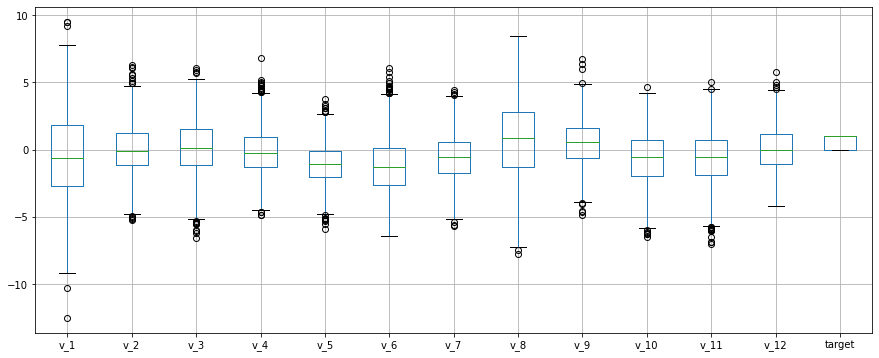

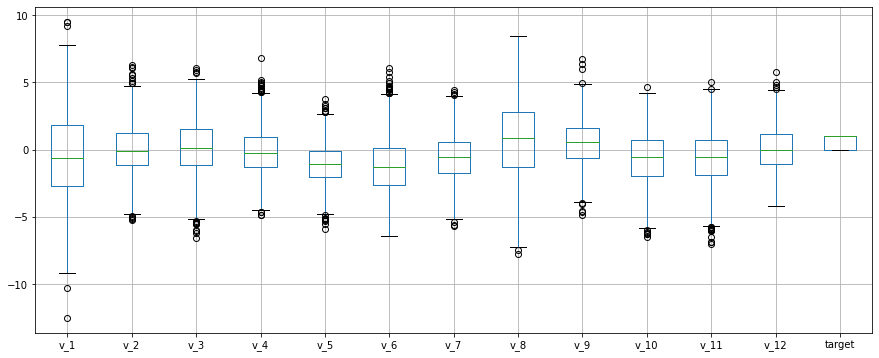

In [233]:
plt.figure(figsize=(15,6))
classification_q1.boxplot(column=list(classification_q1.columns))

In [234]:
df_class_scaled_q1 = scaler.fit_transform(classification_q1[list(classification_q1.columns)[0:12]])
df_class_scaled_q2 = scaler.fit_transform(classification_q2[list(classification_q1.columns)[0:13]])

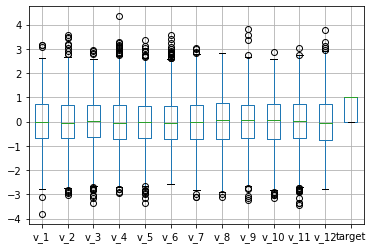

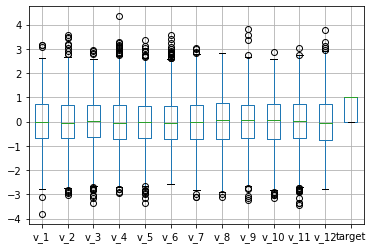

In [235]:
df_q1 = pd.DataFrame(df_class_scaled_q1, columns=list(classification_q1.columns)[0:12])
df_q2 = pd.DataFrame(df_class_scaled_q2, columns=list(classification_q2.columns)[0:13])
df_q1['target'] = classification_q1['target']
df_q2['target'] = classification_q2['target']
df_q1.boxplot(column=list(df_q1.columns))

In [236]:
df_q1.to_csv('class_q1.csv',index=False)
df_q2.to_csv('class_q2.csv',index=False)

### Logistic - R

In [366]:
%%R
df1 <- read.csv('class_q1.csv')
df2 <- read.csv('class_q2.csv')

In [367]:
%%R
str(df2)

'data.frame':	2500 obs. of  14 variables:
 $ v_1   : num  -0.827 -1.475 -0.333 1.26 1.805 ...
 $ v_2   : num  0.48 0.622 0.328 0.73 -1.248 ...
 $ v_3   : num  0.0915 0.0728 -0.1231 0.1514 -0.8531 ...
 $ v_4   : num  -0.305 0.041 -0.321 0.695 0.486 ...
 $ v_5   : num  1.379 0.961 0.117 -1.039 -0.903 ...
 $ v_6   : num  -0.968 -0.62 -0.555 0.496 1.578 ...
 $ v_7   : num  -0.144 -1.136 0.646 0.84 0.663 ...
 $ v_8   : num  0.3482 -0.5423 -0.3418 0.0369 0.8115 ...
 $ v_9   : num  0.634 0.284 -0.352 -0.595 1.571 ...
 $ v_10  : num  0.728 -0.763 0.475 -0.442 0.101 ...
 $ v_11  : num  -0.887 -0.441 0.548 1.219 -0.671 ...
 $ v_12  : num  0.101 -0.857 0.191 1.119 0.129 ...
 $ v_13  : num  -1.006 -1.006 -1.006 0.994 0.994 ...
 $ target: int  0 0 0 1 1 0 1 1 1 0 ...


In [368]:
%%R
set.seed(100)
#get rows to train set
trainrows_df1 <- createDataPartition(df1$target, p=0.8, list=FALSE)
trainrows_df2 <- createDataPartition(df2$target, p=0.8, list=FALSE)
#creating training and test dataset
train_df1_data <- df1[trainrows_df1,]
train_df2_data <- df2[trainrows_df2,]
test_df1_data <- df1[-trainrows_df1,]
test_df2_data <- df2[-trainrows_df2,]
#store x and y to use later
x_df1 <- train_df1_data[,1:12]
x_df2 <- train_df2_data[,1:12]
y_df1 <- train_df1_data$target
y_df2 <- train_df2_data$target

In [369]:
%%R
skimmed <- skim_to_wide(train_df1_data)
skimmed

── Data Summary ────────────────────────
                           Values
Name                       .data 
Number of rows             1440  
Number of columns          13    
_______________________          
Column type frequency:           
  numeric                  13    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate     mean    sd    p0    p25      p50
 1 v_1                   0             1  0.00479 1.00  -3.81 -0.682 -0.0149 
 2 v_2                   0             1  0.00819 1.01  -2.95 -0.681 -0.0584 
 3 v_3                   0             1 -0.00111 1.01  -3.34 -0.625  0.0415 
 4 v_4                   0             1  0.0158  1.00  -2.94 -0.676 -0.0458 
 5 v_5                   0             1  0.00840 1.00  -3.37 -0.654 -0.00642
 6 v_6                   0             1  0.00314 1.01  -2.56 -0.696 -0.0618 
 7 v_7                   

In [370]:
%%R
str(train_df1_data[,0:12])

'data.frame':	1440 obs. of  12 variables:
 $ v_1 : num  -0.407 -0.72 -0.256 -0.871 1.829 ...
 $ v_2 : num  -1.021 -0.934 1.474 -1.225 1.043 ...
 $ v_3 : num  -1.121 -2.074 -0.549 0.289 -1.196 ...
 $ v_4 : num  0.0858 2.1692 0.3132 -0.2084 -0.441 ...
 $ v_5 : num  0.333 1.755 1.342 -0.974 0.826 ...
 $ v_6 : num  -0.916 -1.34 2.644 -0.572 -0.475 ...
 $ v_7 : num  -0.709 -1.695 0.861 0.339 -0.717 ...
 $ v_8 : num  0.26104 0.00134 0.06559 1.19203 -1.1204 ...
 $ v_9 : num  1.102 1.115 -0.913 0.573 0.909 ...
 $ v_10: num  0.952 0.66 0.908 1.259 -2.12 ...
 $ v_11: num  -1.494 -1.916 -0.109 -0.381 -0.869 ...
 $ v_12: num  1.262 0.319 1.718 1.834 -2.208 ...


In [371]:
#using KNN to impute missing data
# %%R
# preProcess_missing_data_model <- preProcess(train_df1_data, method='knnImpute')
# library(RANN)
# train_df1_data <- predict(preProcess_missing_data_model, newdata=train_df1_data)
# anyNA(train_df1_data)

In [372]:
%%R
anyNA(train_df2_data)

[1] FALSE


In [379]:
%%R
# using recursive feature elimination to select important features
set.seed(100)
options(warn=-1)
subsets <- c(1:12)
ctrl <- rfeControl(functions=rfFuncs,
                  method='repeatedcv',
                  repeats=5,
                  verbose=FALSE)
lmProfile <- rfe(x=train_df1_data[,1:12],
                 y=train_df1_data$target,
                 sizes=subsets,
                 rfeControl=ctrl)
lmProfile


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables   RMSE Rsquared    MAE  RMSESD RsquaredSD   MAESD Selected
         1 0.4569   0.2456 0.3048 0.02989    0.06891 0.03019         
         2 0.3426   0.5305 0.2096 0.02787    0.07108 0.02297         
         3 0.2626   0.7210 0.1448 0.02321    0.04808 0.01546         
         4 0.2363   0.7769 0.1355 0.02137    0.04263 0.01413         
         5 0.2311   0.7897 0.1386 0.01930    0.03806 0.01304         
         6 0.2223   0.8026 0.1228 0.02075    0.03869 0.01280         
         7 0.2184   0.8110 0.1234 0.02010    0.03692 0.01306         
         8 0.2180   0.8124 0.1256 0.01995    0.03703 0.01246         
         9 0.2152   0.8163 0.1205 0.02032    0.03672 0.01258         
        10 0.2150   0.8173 0.1224 0.02033    0.03702 0.01264         
        11 0.2134   0.8210 0.1234 0.01926    0.03457 0.01229        *
        12 0.2141

In [374]:
%%R
modelnames <- paste(names(getModelInfo()), collapse=', ')
modelnames

[1] "ada, AdaBag, AdaBoost.M1, adaboost, amdai, ANFIS, avNNet, awnb, awtan, bag, bagEarth, bagEarthGCV, bagFDA, bagFDAGCV, bam, bartMachine, bayesglm, binda, blackboost, blasso, blassoAveraged, bridge, brnn, BstLm, bstSm, bstTree, C5.0, C5.0Cost, C5.0Rules, C5.0Tree, cforest, chaid, CSimca, ctree, ctree2, cubist, dda, deepboost, DENFIS, dnn, dwdLinear, dwdPoly, dwdRadial, earth, elm, enet, evtree, extraTrees, fda, FH.GBML, FIR.DM, foba, FRBCS.CHI, FRBCS.W, FS.HGD, gam, gamboost, gamLoess, gamSpline, gaussprLinear, gaussprPoly, gaussprRadial, gbm_h2o, gbm, gcvEarth, GFS.FR.MOGUL, GFS.LT.RS, GFS.THRIFT, glm.nb, glm, glmboost, glmnet_h2o, glmnet, glmStepAIC, gpls, hda, hdda, hdrda, HYFIS, icr, J48, JRip, kernelpls, kknn, knn, krlsPoly, krlsRadial, lars, lars2, lasso, lda, lda2, leapBackward, leapForward, leapSeq, Linda, lm, lmStepAIC, LMT, loclda, logicBag, LogitBoost, logreg, lssvmLinear, lssvmPoly, lssvmRadial, lvq, M5, M5Rules, manb, mda, Mlda, mlp, mlpKerasDecay, mlpKerasDecayCost, ml

In [375]:
%%R
modelLookup('lm')

  model parameter     label forReg forClass probModel
1    lm intercept intercept   TRUE    FALSE     FALSE


In [376]:
%%R
model_regLogistic <- glm(target ~ ., data=train_df1_data, family=binomial(link='logit'))

In [377]:
%%R
summary(model_regLogistic)


Call:
glm(formula = target ~ ., family = binomial(link = "logit"), 
    data = train_df1_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8550  -0.1580   0.0309   0.2160   3.0097  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.004e-01  1.254e-01   3.989 6.63e-05 ***
v_1         -8.164e+03  6.314e+04  -0.129  0.89713    
v_2         -6.608e+03  4.432e+04  -0.149  0.88148    
v_3         -6.676e+04  6.119e+04  -1.091  0.27529    
v_4          2.781e+04  3.795e+04   0.733  0.46365    
v_5         -4.549e+03  4.092e+04  -0.111  0.91148    
v_6         -1.225e+05  5.066e+04  -2.419  0.01557 *  
v_7          1.493e+05  5.165e+04   2.892  0.00383 ** 
v_8         -8.653e+04  5.483e+04  -1.578  0.11453    
v_9         -1.133e+05  5.329e+04  -2.127  0.03344 *  
v_10        -8.046e+04  4.997e+04  -1.610  0.10739    
v_11        -2.105e+04  5.437e+04  -0.387  0.69858    
v_12         7.961e+04  4.666e+04   1.706  0.08797 .  
---
S

In [378]:
%%R
anova(model_regLogistic, test='Chisq')

Analysis of Deviance Table

Model: binomial, link: logit

Response: target

Terms added sequentially (first to last)


     Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                  1439    1981.84              
v_1   1    19.32      1438    1962.52 1.104e-05 ***
v_2   1   556.66      1437    1405.85 < 2.2e-16 ***
v_3   1     3.47      1436    1402.38   0.06239 .  
v_4   1   638.29      1435     764.09 < 2.2e-16 ***
v_5   1     0.80      1434     763.29   0.37111    
v_6   1   187.53      1433     575.76 < 2.2e-16 ***
v_7   1     3.23      1432     572.53   0.07248 .  
v_8   1     5.27      1431     567.26   0.02173 *  
v_9   1     3.25      1430     564.01   0.07138 .  
v_10  1     0.68      1429     563.34   0.41116    
v_11  1     1.08      1428     562.26   0.29918    
v_12  1     2.95      1427     559.31   0.08607 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Logistic - Python

In [250]:
df_q1.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,-0.407362,-1.021299,-1.120973,0.085822,0.333403,-0.915703,-0.708578,0.261045,1.102175,0.952227,-1.494103,1.262250,0
1,-0.720375,-0.934044,-2.074429,2.169228,1.755439,-1.340004,-1.694888,0.001340,1.115498,0.660372,-1.915685,0.318742,0
2,-0.255825,1.474449,-0.548899,0.313159,1.341830,2.643931,0.860937,0.065586,-0.912952,0.907723,-0.108945,1.717618,1
3,-0.871176,-1.224653,0.288509,-0.208431,-0.974123,-0.572069,0.339450,1.192034,0.572969,1.259259,-0.381493,1.833769,0
4,1.828913,1.042728,-1.195781,-0.441000,0.825692,-0.474696,-0.716685,-1.120397,0.909473,-2.119561,-0.868998,-2.208431,1


,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,-0.407362,-1.021299,-1.120973,0.085822,0.333403,-0.915703,-0.708578,0.261045,1.102175,0.952227,-1.494103,1.262250,0
1,-0.720375,-0.934044,-2.074429,2.169228,1.755439,-1.340004,-1.694888,0.001340,1.115498,0.660372,-1.915685,0.318742,0
2,-0.255825,1.474449,-0.548899,0.313159,1.341830,2.643931,0.860937,0.065586,-0.912952,0.907723,-0.108945,1.717618,1
3,-0.871176,-1.224653,0.288509,-0.208431,-0.974123,-0.572069,0.339450,1.192034,0.572969,1.259259,-0.381493,1.833769,0
4,1.828913,1.042728,-1.195781,-0.441000,0.825692,-0.474696,-0.716685,-1.120397,0.909473,-2.119561,-0.868998,-2.208431,1


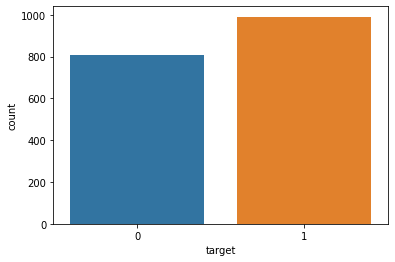

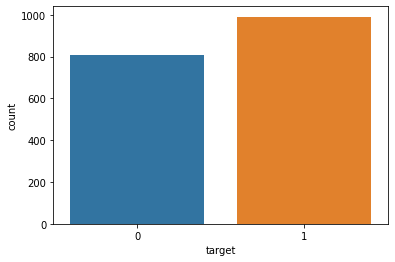

In [251]:
sns.countplot(x='target', data=df_q1)

In [252]:
X_q1=df_q1.loc[:,df_q1.columns != 'target']
Y_q1=df_q1.loc[:,df_q1.columns == 'target']
X_q2=df_q2.loc[:,df_q2.columns != 'target']
Y_q2=df_q2.loc[:,df_q2.columns == 'target']

In [253]:
X_train_q1, X_test_q1, Y_train_q1, Y_test_q1 = train_test_split(X_q1, Y_q1, test_size=0.2, random_state=0)

In [254]:
os = SMOTE(random_state=0)

In [255]:
os_data_X_q1, os_data_Y_q1 = os.fit_sample(X_train_q1, Y_train_q1.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [256]:
os_data_X_q1 = pd.DataFrame(os_data_X_q1, columns=X_train_q1.columns)
os_data_Y_q1 = pd.DataFrame(os_data_Y_q1, columns=Y_train_q1.columns)

In [449]:
# RFE = recusrsion feature elimination - it helps to choose the best and worst performing feature 
logreg = LogisticRegression( penalty='l2', C=0.1)

rfe = RFE(logreg,13)
rfe = rfe.fit(os_data_X_q1, os_data_Y_q1.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


In [451]:
kfold = KFold(n_splits=10, random_state=42)
scores = cross_val_score(logreg, X_train_q2, Y_train_q2.values.ravel(), cv=kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [258]:
logit_model = sm.Logit(os_data_Y_q1, os_data_X_q1)
result = logit_model.fit()

         Current function value: 0.194155
         Iterations: 35
         Current function value: 0.194155
         Iterations: 35


In [259]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit             Pseudo R-squared:  0.720   
Dependent Variable:  target            AIC:               640.6368
Date:                2021-02-01 11:38  BIC:               705.0796
No. Observations:    1588              Log-Likelihood:    -308.32 
Df Model:            11                LL-Null:           -1100.7 
Df Residuals:        1576              LLR p-value:       0.0000  
Converged:           0.0000            Scale:             1.0000  
No. Iterations:      35.0000                                      
------------------------------------------------------------------
       Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------
v_1   1454.4066 61972.4864  0.0235 0.9813 -120009.4347 122918.2479
v_2   -169.1304 42932.7095 -0.0039 0.9969  -84315.6948  83977.4339
v_3   3487.9486 58680.3907  0.0594 0.9526 -111523.5037 118499.4009
v_4    762.0099 35955.5435  0.0212 0.9831  -69709.5605  71233.5802
v_5   -665.1816 39607.9131 -0.0168 0.9866  -78295.2648  76964.9016
v_6   5724.5178 47895.9639  0.1195 0.9049  -88149.8464  99598.8821
v_7  -6927.5068 49972.4883 -0.1386 0.8897 -104871.7840  91016.7704
v_8    797.7428 51951.2234  0.0154 0.9877 -101024.7840 102620.2695
v_9   7009.2816 51233.9183  0.1368 0.8912  -93407.3530 107425.9163
v_10  1957.1899 49903.1372  0.0392 0.9687  -95851.1617  99765.5416
v_11  2789.2079 51256.3905  0.0544 0.9566  -97671.4715 103249.8873
v_12  -643.8364 42994.0458 -0.0150 0.9881  -84910.6176  83622.9449
==================================================================

"""

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit             Pseudo R-squared:  0.720   
Dependent Variable:  target            AIC:               640.6368
Date:                2021-02-01 11:40  BIC:               705.0796
No. Observations:    1588              Log-Likelihood:    -308.32 
Df Model:            11                LL-Null:           -1100.7 
Df Residuals:        1576              LLR p-value:       0.0000  
Converged:           0.0000            Scale:             1.0000  
No. Iterations:      35.0000                                      
------------------------------------------------------------------
       Coef.     Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------
v_1   1454.4066 61972.4864  0.0235 0.9813 -120009.4347 122918.2479
v_2   -169.1304 42932.7095 -0.0039 0.9969  -84315.6948  83977.4339
v_3   3487.9486 58680.3907  0.0594 0.9526 -111523.5037 118499.4009
v_4    762.0099 35955.5435  0.0212 0.9831  -69709.5605  71233.5802
v_5   -665.1816 39607.9131 -0.0168 0.9866  -78295.2648  76964.9016
v_6   5724.5178 47895.9639  0.1195 0.9049  -88149.8464  99598.8821
v_7  -6927.5068 49972.4883 -0.1386 0.8897 -104871.7840  91016.7704
v_8    797.7428 51951.2234  0.0154 0.9877 -101024.7840 102620.2695
v_9   7009.2816 51233.9183  0.1368 0.8912  -93407.3530 107425.9163
v_10  1957.1899 49903.1372  0.0392 0.9687  -95851.1617  99765.5416
v_11  2789.2079 51256.3905  0.0544 0.9566  -97671.4715 103249.8873
v_12  -643.8364 42994.0458 -0.0150 0.9881  -84910.6176  83622.9449
==================================================================

"""

In [260]:
logreg.fit(X_train_q1, Y_train_q1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [261]:
Y_pred_q1 = logreg.predict(X_test_q1)

In [262]:
print(f'The accuracy is {logreg.score(X_test_q1, Y_test_q1)}')

The accuracy is 0.925
The accuracy is 0.925


In [263]:
confusion_ma = confusion_matrix(Y_test_q1, Y_pred_q1)
confusion_ma

array([[148,  15],
       [ 12, 185]])

array([[148,  15],
       [ 12, 185]])

In [264]:
print(f'Correct predictions is {confusion_ma[0][0]+confusion_ma[1][1]}')
print(f'Incorrect predictions is {confusion_ma[0][1]+confusion_ma[1][0]}')

Correct predictions is 333
Incorrect predictions is 27
Correct predictions is 333
Incorrect predictions is 27


In [265]:
print(classification_report(Y_test_q1, Y_pred_q1))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.93      0.94      0.93       197

    accuracy                           0.93       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.93      0.92       360

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.93      0.94      0.93       197

    accuracy                           0.93       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.93      0.92       360



In [266]:
X_train_q2, X_test_q2, Y_train_q2, Y_test_q2 = train_test_split(X_q2, Y_q2, test_size=0.2, random_state=0)

In [267]:
os_data_X_q2, os_data_Y_q2 = os.fit_sample(X_train_q2, Y_train_q2.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [268]:
os_data_X_q2 = pd.DataFrame(os_data_X_q2, columns=X_train_q2.columns)
os_data_Y_q2 = pd.DataFrame(os_data_Y_q2, columns=Y_train_q2.columns)

In [269]:
# RFE = recusrsion feature elimination - it helps to choose the best and worst performing feature 
rfe = RFE(logreg,13)
rfe = rfe.fit(os_data_X_q2, os_data_Y_q2.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [270]:
# logit_model2 = sm.Logit(os_data_Y_q2, os_data_X_q2)
# result2 = logit_model2.fit()

In [271]:
# result2.summary2()

In [452]:
logreg.fit(X_train_q2, Y_train_q2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [453]:
Y_pred_q2 = logreg.predict(X_test_q2)

In [454]:
print(f'The accuracy is {logreg.score(X_test_q2, Y_test_q2)}')

The accuracy is 1.0


In [455]:
confusion = confusion_matrix(Y_test_q2, Y_pred_q2)
confusion

array([[247,   0],
       [  0, 253]])

In [276]:
print(f'Correct predictions is {confusion[0][0]+confusion[1][1]}')
print(f'Incorrect predictions is {confusion[0][1]+confusion[1][0]}')

Correct predictions is 500
Incorrect predictions is 0
Correct predictions is 500
Incorrect predictions is 0


In [277]:
print(classification_report(Y_test_q2, Y_pred_q2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [458]:
auc = roc_auc_score(Y_test_q2, Y_pred_q2)
auc

1.0

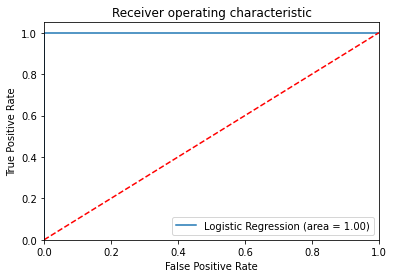

In [456]:
logit_roc_auc = roc_auc_score(Y_test_q2,Y_pred_q2)
fpr, tpr, thresholds = roc_curve( Y_test_q2, Y_pred_q2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Naives

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([-12.52534 , -10.320547,  -8.115754,  -5.910961,  -3.706168,
         -1.501375,   0.703418,   2.908211,   5.113004,   7.317797,
          9.52259 ]),
 <a list of 1800 Lists of Patches objects>)

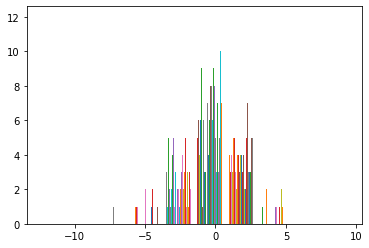

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]),
 array([-12.52534 , -10.320547,  -8.115754,  -5.910961,  -3.706168,
         -1.501375,   0.703418,   2.908211,   5.113004,   7.317797,
          9.52259 ]),
 <a list of 1800 Lists of Patches objects>)

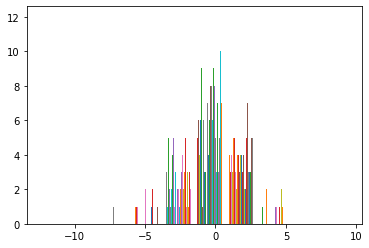

In [279]:
plt.hist(classification_q1)

In [280]:
class_gauss = GaussianNB()

In [281]:
class_gauss.fit(X_train_q1, Y_train_q1)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [282]:
Y_gauss_pred = class_gauss.predict(X_test_q1)

In [283]:
print(f'The accuracy is {class_gauss.score(X_test_q1, Y_test_q1):.2f}')

The accuracy is 0.91
The accuracy is 0.91


In [284]:
confusion_matrix(Y_test_q1, Y_gauss_pred)

array([[145,  18],
       [ 14, 183]])

array([[145,  18],
       [ 14, 183]])

### KNN

In [285]:
classifier = KNeighborsClassifier(n_neighbors=2, )
result = classifier.fit(X_train_q1, Y_train_q1.values.ravel())

In [286]:
Y_knn_pred = classifier.predict(X_test_q1)

In [287]:
confusion_matrix(Y_test_q1, Y_knn_pred)

array([[159,   4],
       [ 22, 175]])

array([[159,   4],
       [ 22, 175]])

In [288]:
print(f'The accuracy is {classifier.score(X_test_q1, Y_test_q1):.2f}')

The accuracy is 0.93
The accuracy is 0.93


In [289]:
result2 = classifier.fit(X_train_q2, Y_train_q2.values.ravel())

In [290]:
Y_knn_pred2 = classifier.predict(X_test_q2)

In [291]:
confusion_matrix(Y_test_q2, Y_knn_pred2)

array([[247,   0],
       [  3, 250]])

array([[247,   0],
       [  3, 250]])

In [292]:
print(f'The accuracy is {classifier.score(X_test_q2, Y_test_q2):.2f}')

The accuracy is 0.99
The accuracy is 0.99


### Decision Tree Classification

In [441]:
kfold = KFold(n_splits=10, random_state=42)
class_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
scores = cross_val_score(class_tree, X_train_q1, Y_train_q1.values.ravel(), cv=kfold)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [445]:
result1 = class_tree.fit(X_train_q1, Y_train_q1)
Y_tree_pred1 = class_tree.predict(X_test_q1)
probs = class_tree.predict_proba(X_test_q1)

In [448]:
prob = probs[:,1]
loss = log_loss(Y_test_q1, probs)
loss

4.413288094905254

In [444]:
confusion_matrix(Y_test_q1, Y_tree_pred1)

array([[138,  25],
       [ 21, 176]])

In [296]:
print(f'The accuracy is {class_tree.score(X_test_q1, Y_test_q1):.2f}')

The accuracy is 0.87
The accuracy is 0.87


In [297]:
result2 = class_tree.fit(X_train_q2, Y_train_q2)

In [298]:
Y_tree_pred2 = class_tree.predict(X_test_q2)

In [299]:
confusion_matrix(Y_test_q2, Y_tree_pred2)

array([[247,   0],
       [  0, 253]])

array([[247,   0],
       [  0, 253]])

In [300]:
print(f'The accuracy is {class_tree.score(X_test_q2, Y_test_q2):.2f}')

The accuracy is 1.00
The accuracy is 1.00


### Random Forest

In [301]:
regressor = RandomForestClassifier(n_estimators=500, random_state=0)

In [302]:
res1 = regressor.fit(X_train_q1, Y_train_q1.values.ravel())
Y_rand_pred = regressor.predict(X_test_q1)

In [303]:
confusion_matrix(Y_test_q1, Y_rand_pred)

array([[149,  14],
       [  6, 191]])

array([[149,  14],
       [  6, 191]])

In [304]:
print(f'The accuracy is {res1.score(X_test_q1, Y_test_q1):.2f}')
print(classification_report(Y_test_q1, Y_rand_pred))

The accuracy is 0.94
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       163
           1       0.93      0.97      0.95       197

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360

The accuracy is 0.94
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       163
           1       0.93      0.97      0.95       197

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



In [305]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_q1,Y_rand_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_q1,Y_rand_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_q1,Y_rand_pred)))

Mean Absolute Error: 0.05555555555555555
Mean Squared Error: 0.05555555555555555
Root Mean Squared Error: 0.23570226039551584
Mean Absolute Error: 0.05555555555555555
Mean Squared Error: 0.05555555555555555
Root Mean Squared Error: 0.23570226039551584


In [306]:
res2 = regressor.fit(X_train_q2, Y_train_q2.values.ravel())
Y_rand_pred2 = regressor.predict(X_test_q2)

In [307]:
confusion_matrix(Y_test_q2, Y_rand_pred2)

array([[247,   0],
       [  0, 253]])

array([[247,   0],
       [  0, 253]])

In [308]:
print(f'The accuracy is {res2.score(X_test_q2, Y_test_q2):.2f}')
print(classification_report(Y_test_q2, Y_rand_pred2))

The accuracy is 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

The accuracy is 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [309]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_q2,Y_rand_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_q2,Y_rand_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_q2,Y_rand_pred2)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


### Neural Network

In [310]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [311]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [312]:
result1 = model.fit(X_train_q1,Y_train_q1, epochs=150, batch_size=10, verbose=0)

In [313]:
loss_rate, accuracy = model.evaluate(X_train_q1, Y_train_q1)

45/45 [==============================] - 0s 875us/step - loss: 0.0495 - accuracy: 0.9875


In [314]:
Y_neural_pred = model.predict_classes(X_test_q1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

In [315]:
confusion_matrix(Y_test_q1, [round(x[0]) for x in Y_neural_pred])

array([[151,  12],
       [  4, 193]])

array([[154,   9],
       [  5, 192]])

In [316]:
model2 = Sequential()
model2.add(Dense(12, input_dim=13, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [317]:
result2 = model2.fit(X_train_q2, Y_train_q2, epochs=150, batch_size=13, verbose=0)

In [318]:
loss_rate, accuracy = model2.evaluate(X_train_q2, Y_train_q2)

63/63 [==============================] - 0s 860us/step - loss: 4.7157e-09 - accuracy: 1.0000


In [319]:
Y_neural_pred2 = model2.predict(X_test_q2)

In [320]:
confusion_matrix(Y_test_q2, [round(x[0]) for x in Y_neural_pred2])

array([[247,   0],
       [  0, 253]])

array([[247,   0],
       [  0, 253]])

### Boosting

#### Gradient

In [321]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

In [322]:
for x in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=x, max_features=2, max_depth=2, random_state=0,)
    gb_clf.fit(X_train_q1, Y_train_q1.values.ravel())

    print("Learning rate: ", x)
    print(f"Accuracy score (training): {gb_clf.score(X_train_q1, Y_train_q1):.3f}")
    print(f"Accuracy score (validation): {gb_clf.score(X_test_q1, Y_test_q1):.3f}")

Learning rate:  0.05
Accuracy score (training): 0.908
Accuracy score (validation): 0.894
Learning rate:  0.075
Accuracy score (training): 0.911
Accuracy score (validation): 0.892
Learning rate:  0.1
Accuracy score (training): 0.920
Accuracy score (validation): 0.889
Learning rate:  0.25
Accuracy score (training): 0.945
Accuracy score (validation): 0.925
Learning rate:  0.5
Accuracy score (training): 0.956
Accuracy score (validation): 0.931
Learning rate:  0.75
Accuracy score (training): 0.960
Accuracy score (validation): 0.942
Learning rate:  1
Accuracy score (training): 0.963
Accuracy score (validation): 0.928
Learning rate:  0.05
Accuracy score (training): 0.908
Accuracy score (validation): 0.894
Learning rate:  0.075
Accuracy score (training): 0.911
Accuracy score (validation): 0.892
Learning rate:  0.1
Accuracy score (training): 0.920
Accuracy score (validation): 0.889
Learning rate:  0.25
Accuracy score (training): 0.945
Accuracy score (validation): 0.925
Learning rate:  0.5
Accur

In [323]:
gb_clf1 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0,)
gb_clf1.fit(X_train_q1, Y_train_q1.values.ravel())
Y_boost_pred = gb_clf1.predict(X_test_q1)

In [324]:
confusion_matrix(Y_test_q1, Y_boost_pred)

array([[148,  15],
       [ 11, 186]])

array([[148,  15],
       [ 11, 186]])

In [325]:
print(classification_report(Y_test_q1, Y_boost_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.93      0.94      0.93       197

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       163
           1       0.93      0.94      0.93       197

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



In [326]:
for x in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=x, max_features=2, max_depth=2, random_state=0,)
    gb_clf.fit(X_train_q2, Y_train_q2.values.ravel())

    print("Learning rate: ", x)
    print(f"Accuracy score (training): {gb_clf.score(X_train_q2, Y_train_q2):.3f}")
    print(f"Accuracy score (validation): {gb_clf.score(X_test_q2, Y_test_q2):.3f}")

Learning rate:  0.05
Accuracy score (training): 0.982
Accuracy score (validation): 0.996
Learning rate:  0.075
Accuracy score (training): 0.985
Accuracy score (validation): 1.000
Learning rate:  0.1
Accuracy score (training): 0.984
Accuracy score (validation): 0.998
Learning rate:  0.25
Accuracy score (training): 0.988
Accuracy score (validation): 0.994
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 1.000
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.998
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.998
Learning rate:  0.05
Accuracy score (training): 0.982
Accuracy score (validation): 0.996
Learning rate:  0.075
Accuracy score (training): 0.985
Accuracy score (validation): 1.000
Learning rate:  0.1
Accuracy score (training): 0.984
Accuracy score (validation): 0.998
Learning rate:  0.25
Accuracy score (training): 0.988
Accuracy score (validation): 0.994
Learning rate:  0.5
Accur

In [327]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0,)
gb_clf2.fit(X_train_q2, Y_train_q2.values.ravel())
Y_boost_pred2 = gb_clf2.predict(X_test_q2)

In [328]:
confusion_matrix(Y_test_q2, Y_boost_pred2)

array([[247,   0],
       [  1, 252]])

array([[247,   0],
       [  1, 252]])

In [329]:
print(classification_report(Y_test_q2, Y_boost_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



#### XGBoost


In [330]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_q1, Y_train_q1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [331]:
Y_xgboost_pred = xgb_clf.predict(X_test_q1)

In [332]:
accuracy_score(Y_test_q1, Y_xgboost_pred)

0.9472222222222222

0.9472222222222222

In [333]:
xgb_clf.score(X_test_q1, Y_test_q1)

0.9472222222222222

0.9472222222222222

In [334]:
xgb_clf2 = XGBClassifier()
xgb_clf2.fit(X_train_q2, Y_train_q2)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [335]:
Y_xgboost_pred2 = xgb_clf2.predict(X_test_q2)

In [336]:
accuracy_score(Y_test_q2, Y_xgboost_pred2)

1.0

1.0

#### ADA Boosting

In [337]:
#base_estimator = decision tree
ada = AdaBoostClassifier(random_state=0)

In [338]:
ada_model = ada.fit(X_train_q1, Y_train_q1.values.ravel())
Y_ada_pred = ada_model.predict(X_test_q1)

In [339]:
accuracy_score(Y_test_q1, Y_ada_pred)

0.9416666666666667

0.9416666666666667

In [340]:
svc = SVC(probability=True, kernel='linear')
ada_ = AdaBoostClassifier(base_estimator=svc, random_state=0)
ada_model_ = ada_.fit(X_train_q1, Y_train_q1.values.ravel())
Y_ada_pred_ = ada_model_.predict(X_test_q1)
accuracy_score(Y_test_q1, Y_ada_pred_)

0.6638888888888889

0.6638888888888889

In [341]:
ada_model = ada.fit(X_train_q2, Y_train_q2.values.ravel())
Y_ada_pred2 = ada_model.predict(X_test_q2)

In [342]:
accuracy_score(Y_test_q2, Y_ada_pred2)

1.0

1.0

## Regression

In [343]:
regression_q1.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,target
0,-0.97127,-0.56128,1.20414,2.25145,-0.25802,0.06246,-1.78623,-0.27690,-0.22255,0.20963,-0.062202
1,0.89456,-0.94099,-0.19972,-0.08354,-0.96865,0.62801,0.91543,0.20413,-0.13587,0.96820,0.112596
2,-0.98777,-0.55565,-0.94141,-1.86277,0.38659,-0.02523,-1.26714,1.07328,-0.28350,0.34430,0.167633
3,0.03972,-0.99258,0.63481,0.01554,-0.39203,-0.72647,0.46098,0.79395,0.22686,0.25065,-0.844727
4,-1.66022,-0.06734,-0.72252,-1.32035,0.06715,2.39937,-1.30566,-0.65222,0.36628,0.31644,2.221942


,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,target
0,-0.97127,-0.56128,1.20414,2.25145,-0.25802,0.06246,-1.78623,-0.27690,-0.22255,0.20963,-0.062202
1,0.89456,-0.94099,-0.19972,-0.08354,-0.96865,0.62801,0.91543,0.20413,-0.13587,0.96820,0.112596
2,-0.98777,-0.55565,-0.94141,-1.86277,0.38659,-0.02523,-1.26714,1.07328,-0.28350,0.34430,0.167633
3,0.03972,-0.99258,0.63481,0.01554,-0.39203,-0.72647,0.46098,0.79395,0.22686,0.25065,-0.844727
4,-1.66022,-0.06734,-0.72252,-1.32035,0.06715,2.39937,-1.30566,-0.65222,0.36628,0.31644,2.221942


In [344]:
regression_q2.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,1.92864,1.48414,0.86814,-0.67666,-0.28747,-1.45108,-0.73662,0.03134,-0.53872,1.30562,0.11557,-0.30478,127.682465
1,0.22185,-0.55320,-0.29845,0.65870,-0.30132,1.49319,-0.43096,0.33835,-0.30827,1.25765,1.88584,-0.57726,50.022972
2,-0.02183,0.13602,-0.37426,-1.29096,0.71912,1.95088,1.99309,-1.24197,-2.15377,-2.01455,-0.84625,0.29845,-24.364369
3,0.86528,1.36937,1.27999,1.18124,-0.72465,-0.02175,0.40340,-0.28272,-0.44390,0.84051,0.03326,-0.98550,96.415408
4,1.41333,-0.02920,-0.67228,1.76116,-1.12178,0.18002,0.48476,-0.76394,-0.16421,-2.42048,0.79727,-0.44033,157.407129


,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,1.92864,1.48414,0.86814,-0.67666,-0.28747,-1.45108,-0.73662,0.03134,-0.53872,1.30562,0.11557,-0.30478,127.682465
1,0.22185,-0.55320,-0.29845,0.65870,-0.30132,1.49319,-0.43096,0.33835,-0.30827,1.25765,1.88584,-0.57726,50.022972
2,-0.02183,0.13602,-0.37426,-1.29096,0.71912,1.95088,1.99309,-1.24197,-2.15377,-2.01455,-0.84625,0.29845,-24.364369
3,0.86528,1.36937,1.27999,1.18124,-0.72465,-0.02175,0.40340,-0.28272,-0.44390,0.84051,0.03326,-0.98550,96.415408
4,1.41333,-0.02920,-0.67228,1.76116,-1.12178,0.18002,0.48476,-0.76394,-0.16421,-2.42048,0.79727,-0.44033,157.407129


In [345]:
regression_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     3000 non-null   float64
 1   v_2     3000 non-null   float64
 2   v_3     3000 non-null   float64
 3   v_4     3000 non-null   float64
 4   v_5     3000 non-null   float64
 5   v_6     3000 non-null   float64
 6   v_7     3000 non-null   float64
 7   v_8     3000 non-null   float64
 8   v_9     3000 non-null   float64
 9   v_10    3000 non-null   float64
 10  target  3000 non-null   float64
dtypes: float64(11)
memory usage: 257.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     3000 non-null   float64
 1   v_2     3000 non-null   float64
 2   v_3     3000 non-null   float64
 3   v_4     3000 non-null   float64
 4   v_5     3000 non-null   float64
 5 

In [346]:
regression_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     2500 non-null   float64
 1   v_2     2500 non-null   float64
 2   v_3     2500 non-null   float64
 3   v_4     2500 non-null   float64
 4   v_5     2500 non-null   float64
 5   v_6     2500 non-null   float64
 6   v_7     2500 non-null   float64
 7   v_8     2500 non-null   float64
 8   v_9     2500 non-null   float64
 9   v_10    2500 non-null   float64
 10  v_11    2500 non-null   float64
 11  v_12    2500 non-null   float64
 12  target  2500 non-null   float64
dtypes: float64(13)
memory usage: 254.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     2500 non-null   float64
 1   v_2     2500 non-null   float64
 2   v_3     2500 non-null   float64
 3 

In [347]:
regression_q1.isnull().sum()

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
target    0
dtype: int64

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
target    0
dtype: int64

In [348]:
regression_q2.isnull().sum()

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
v_11      0
v_12      0
target    0
dtype: int64

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
v_11      0
v_12      0
target    0
dtype: int64

In [349]:
df_r_scaled_q1 = scaler.fit_transform(regression_q1[list(regression_q1.columns)[0:10]])
df_r_scaled_q2 = scaler.fit_transform(regression_q2[list(regression_q2.columns)[0:12]])

df_r_q1 = pd.DataFrame(df_r_scaled_q1, columns=list(regression_q1.columns)[0:10])
df_r_q2 = pd.DataFrame(df_r_scaled_q2, columns=list(regression_q2.columns)[0:12])
df_r_q1['target'] = regression_q1['target']
df_r_q2['target'] = regression_q2['target']

In [350]:
X_r_q1=df_r_q1.loc[:,df_r_q1.columns != 'target']
Y_r_q1=df_r_q1.loc[:,df_r_q1.columns == 'target']
X_r_q2=df_r_q2.loc[:,df_r_q2.columns != 'target']
Y_r_q2=df_r_q2.loc[:,df_r_q2.columns == 'target']

X_r_train_q1, X_r_test_q1, Y_r_train_q1, Y_r_test_q1 = train_test_split(X_r_q1, Y_r_q1, test_size=0.2, random_state=0)
X_r_train_q2, X_r_test_q2, Y_r_train_q2, Y_r_test_q2 = train_test_split(X_r_q2, Y_r_q2, test_size=0.2, random_state=0)

### Linear Regression

In [351]:
lm = LinearRegression()

In [352]:
lr_model = lm.fit(X_r_train_q1, Y_r_train_q1)
Y_lr_pred = lr_model.predict(X_r_test_q1)

In [353]:
#R^2
lr_model.score(X_r_test_q1, Y_r_test_q1)

0.999999747139457

0.999999747139457

In [354]:
#f(x)=b0+b1x
#intercept = b0
#coef = b1
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)

intercept: [4.60049249e-06]
slope: [[ 1.43635812e-05 -8.11436317e-06 -1.55669847e-05  7.71173589e-06
   4.71815877e-01  8.93771729e-01  9.19687623e-06  2.80476509e-06
  -6.63966233e-06  2.53850480e-06]]
intercept: [4.60049249e-06]
slope: [[ 1.43635812e-05 -8.11436317e-06 -1.55669847e-05  7.71173589e-06
   4.71815877e-01  8.93771729e-01  9.19687623e-06  2.80476509e-06
  -6.63966233e-06  2.53850480e-06]]


In [355]:
lr_model2 = lm.fit(X_r_train_q2, Y_r_train_q2)
Y_lr_pred2 = lr_model2.predict(X_r_test_q2)

In [356]:
#R^2
lr_model2.score(X_r_test_q2, Y_r_test_q2)

0.9999996625068718

0.9999996625068718

In [357]:
#f(x)=b0+b1x
#intercept = b0
#coef = b1
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)

intercept: [0.55432098]
slope: [[ 9.96719913e+01  3.00356513e-05 -8.22414255e-04  6.17905516e+01
   8.68657196e+01 -1.53205507e-03  1.18779142e-03 -4.18966837e-03
  -1.51537489e-03  1.85807216e-03  7.18109355e+00  2.35391025e-03]]
intercept: [0.55432098]
slope: [[ 9.96719913e+01  3.00356513e-05 -8.22414255e-04  6.17905516e+01
   8.68657196e+01 -1.53205507e-03  1.18779142e-03 -4.18966837e-03
  -1.51537489e-03  1.85807216e-03  7.18109355e+00  2.35391025e-03]]


### Decision Tree Regressor

In [358]:
regressor = DecisionTreeRegressor(random_state=0)

In [359]:
tree_model = regressor.fit(X_r_train_q1, Y_r_train_q1)
Y_tree_r_pred1 = regressor.predict(X_r_test_q1)

In [360]:
tree_model.score(X_r_train_q1, Y_r_train_q1)

0.9999999983866392

0.9999999983866392

In [361]:
tree_model2 = regressor.fit(X_r_train_q2, Y_r_train_q2)
Y_tree_r_pred2 = regressor.predict(X_r_test_q2)

In [362]:
tree_model2.score(X_r_train_q2, Y_r_train_q2)

1.0

1.0

In [363]:
# export_graphviz(regressor, out_file ='tree.dot',  
#                feature_names =X_r_train_q2.columns)  

### L1 and L2 regularization

In [364]:
#L2
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9):
  ridgeModel = Ridge(alpha = i * 0.25) 
  ridgeModel.fit(X_r_train_q1, Y_r_train_q1)
  scores = cross_val_score(ridgeModel, X_r_q1, Y_r_q1, cv = 10) 
  avg_cross_val_score = scores.mean()
  cross_val_scores_ridge.append(avg_cross_val_score) 
  alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


0.25 : 0.9999997238161488
0.5 : 0.9999996965774092
0.75 : 0.9999996512364655
1.0 : 0.9999995878037277
1.25 : 0.9999995062895994
1.5 : 0.9999994067044783
1.75 : 0.9999992890587555
2.0 : 0.9999991533628174


KeyboardInterrupt: ignored

In [ ]:
#L2
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9):
  ridgeModel = Ridge(alpha = i * 0.25) 
  ridgeModel.fit(X_r_train_q2, Y_r_train_q2)
  scores = cross_val_score(ridgeModel, X_r_q2, Y_r_q2, cv = 10) 
  avg_cross_val_score = scores.mean()
  cross_val_scores_ridge.append(avg_cross_val_score) 
  alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

0.25 : 0.9999996861413825
0.5 : 0.9999996459010729
0.75 : 0.999999578778336
1.0 : 0.9999994847920014
1.25 : 0.9999993639608862
1.5 : 0.9999992163037934
1.75 : 0.9999990418395134
2.0 : 0.9999988405868232


In [ ]:
#L1
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
	lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
	lassoModel.fit(X_r_train_q1, Y_r_train_q1) 
	scores = cross_val_score(lassoModel, X_r_q1, Y_r_q1, cv = 10) 
	avg_cross_val_score = scores.mean()
	cross_val_scores_lasso.append(avg_cross_val_score) 
	Lambda.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i])) 


0.25 : 0.8712990021391015
0.5 : 0.5264083189826654
0.75 : 0.2136347234936921
1.0 : -0.0010283843588469344
1.25 : -0.0010283843588469344
1.5 : -0.0010283843588469344
1.75 : -0.0010283843588469344
2.0 : -0.0010283843588469344


### Elastic NEt

In [381]:
from sklearn.linear_model import ElasticNet

In [382]:
model = ElasticNet( alpha=1.0, l1_ratio=0.01)

In [384]:
cv = RepeatedKFold(n_splits=5,  n_repeats=3, random_state=1)

In [385]:
scores = cross_val_score(model, X_r_train_q1, Y_r_train_q1, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [388]:
result = model.fit(X_r_train_q1, Y_r_train_q1)

In [389]:
Y_elas_pred = model.predict(X_r_test_q1)

In [390]:
result.score(X_r_train_q1, Y_r_train_q1)

0.7403595045818153

In [396]:
print(classification_report(Y_r_test_q1, Y_elas_pred))

ValueError: ignored

### SVM

In [402]:
svmclass = SVR( C=0.001, kernel='linear')

In [403]:
cv = RepeatedKFold(n_splits=5,  n_repeats=3, random_state=1)

In [404]:
scores = cross_val_score(svmclass, X_r_train_q1, Y_r_train_q1.values.ravel(), cv=cv)

In [406]:
result_svm = svmclass.fit(X_r_train_q1, Y_r_train_q1.values.ravel())

In [410]:
Y_svm_pred = svmclass.predict(X_r_test_q1)

In [417]:
mse = mean_squared_error(Y_r_test_q1, Y_svm_pred)
mse

0.007254301274009693

In [421]:
np.sqrt(scores)

array([0.99480025, 0.99504352, 0.99482745, 0.99499048, 0.99468184,
       0.99509368, 0.99471134, 0.99506272, 0.99478684, 0.9948424 ,
       0.99483941, 0.99507821, 0.99483949, 0.99468639, 0.99515063])

In [420]:
mean(scores)

0.9898173656681459

In [422]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [430]:
pred = [0.1,0.0,0.2,0.1]
mean_absolute_error([0.1,0.1,0.1,0.1], pred)*100

5.0